In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("Municipios_coordenadas.csv")

In [ ]:
df

,Municipio,Longitud,Latitud
0,Tepic,-104.8938,21.5079
1,Laguna de Nayarit,-105.2289,21.4179
2,Sayulita,-105.4417,20.8681
3,San Blas,-105.2769,21.5453
4,Compostela,-105.1922,21.2347
5,Punta de Mita,-105.4633,20.7725
6,Mexcatitán,-105.2439,22.0431
7,Jala,-104.7972,21.0164
8,La Tovara,-105.2814,21.5364
9,Rincón de Guayabitos,-105.2778,21.0294


In [ ]:
X= df.drop(["Municipio"], axis=1)

In [ ]:
from sklearn.cluster import KMeans

clustering_Kmeans = KMeans(n_clusters=2, max_iter=300)
clustering_Kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
df['Cluster']=clustering_Kmeans.labels_
df

,Municipio,Longitud,Latitud,Cluster
0,Tepic,-104.8938,21.5079,0
1,Laguna de Nayarit,-105.2289,21.4179,0
2,Sayulita,-105.4417,20.8681,1
3,San Blas,-105.2769,21.5453,0
4,Compostela,-105.1922,21.2347,1
5,Punta de Mita,-105.4633,20.7725,1
6,Mexcatitán,-105.2439,22.0431,0
7,Jala,-104.7972,21.0164,1
8,La Tovara,-105.2814,21.5364,0
9,Rincón de Guayabitos,-105.2778,21.0294,1


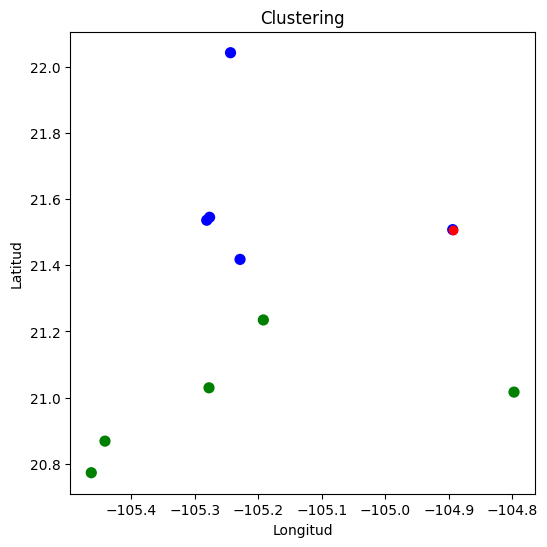

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(6,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.set_title("Clustering")

colores=np.array(['blue','green'])
ax.scatter(x=df.Longitud, y=df.Latitud,
           c=colores[df.Cluster], s=50)
ax.scatter(x=-104.8938, y=21.5079, c='red')
plt.show()

In [ ]:
df.rename(columns={"Longitud": "x", "Latitud": "y"})

,Municipio,x,y,Cluster
0,Tepic,-104.8938,21.5079,0
1,Laguna de Nayarit,-105.2289,21.4179,0
2,Sayulita,-105.4417,20.8681,1
3,San Blas,-105.2769,21.5453,0
4,Compostela,-105.1922,21.2347,1
5,Punta de Mita,-105.4633,20.7725,1
6,Mexcatitán,-105.2439,22.0431,0
7,Jala,-104.7972,21.0164,1
8,La Tovara,-105.2814,21.5364,0
9,Rincón de Guayabitos,-105.2778,21.0294,1


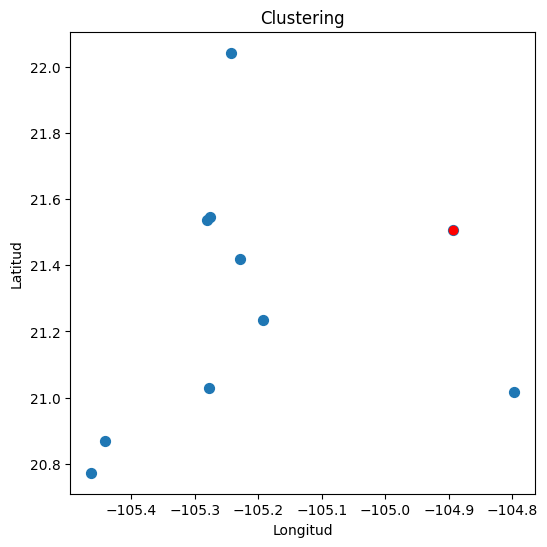

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(6,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.set_title("Clustering")

colores=np.array(['blue','green'])
ax.scatter(x=df.Longitud, y=df.Latitud,
          s=50)
ax.scatter(x=-104.8938, y=21.5079, c='red')
plt.show()

# Primer modelo para modelacion de las dos rutas

In [ ]:
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 41.5 MB/s eta 0:00:00


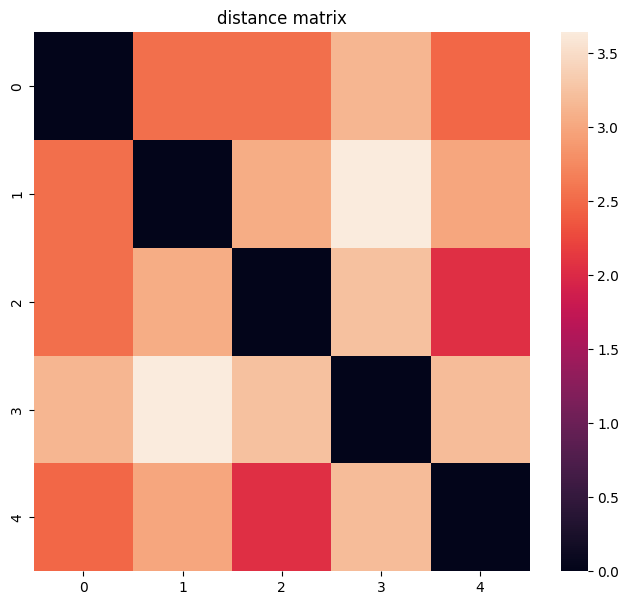

In [ ]:
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
import pulp
n_customer = 4
n_point = n_customer + 1
distances = pd.DataFrame(np.array([[0, 2.536, 2.536, 3.13, 2.481],
                                   [2.536, 0, 3.05, 3.64, 2.994],
                                   [2.536, 3.05, 0, 3.23, 2.059],
                                   [3.13, 3.64, 3.23, 0, 3.19],
                                   [2.481, 2.994, 2.059, 3.19, 0]]))
fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(distances)
plt.title('distance matrix')
plt.show()

In [ ]:
# Tipo de problema
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# Variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# Variable artificial para eliminacion de subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# Funcion objetivo
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# Restricciones
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# Eliminacion de subtours
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1


status = problem.solve()
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 13.946000000000002)

### Explicacion del codigo
Primeramente se guarda en una variable el problema que se va a realizar, asi como el nombre del mismo y el objetivo (minimizar), en nuestro caso lo guardamos en la variable problem. \
Como siguiente paso se inicializan las variables, tanto las x con un valor binario, comprendida por los conjuntos de nodo de origen "i" y de destino "j", que se refieren si se usa o no un arco. Asi como las variables artificiales "u", que nos permitiran la eliminacion de los subtours, que se refieren al numero de paso que se visito i ciudad, con un valor posible desde el 0 hasta el numero total de ciudades, y una variable tipo entero. \
La funcion objetivo se comprende de la doble suma de los conjuntos de "i" y "j" de la multiplicacion de costos por la variable binaria x_i,j. \
Por ultimo, las restricciones, se considera que no se puede utilizar la diagonal de los costos, por esos a la variable x(i,i) se le asigna un valor de 0, se considera las otras dos restricciones que cualquier nodo de origen solamente puede ir a un nodo de destino, asi como viceversa. Y de igual manera se da la eliminazion de los subtours. \
Por ultimo se pide que se resuelva el problema, asi como que se despliegue el resultado del mismo. \
Se baso en el codigo extraido de la plataforma Kaggle:
https://www.kaggle.com/code/itoeiji/solving-tsp-and-vrp-by-mip-using-pulp/notebook



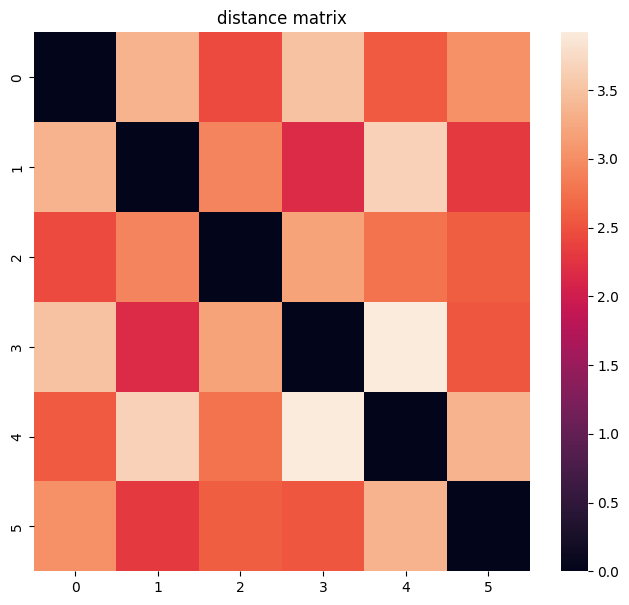

In [ ]:
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
import pulp
n_customer = 5
n_point = n_customer + 1
distances = pd.DataFrame(np.array([[0, 3.34, 2.443, 3.5, 2.56, 3.02],
                                   [3.34, 0, 2.916, 2.173, 3.65, 2.306],
                                   [2.443, 2.916, 0, 3.19, 2.764, 2.594],
                                   [3.5, 2.173, 3.19, 0, 3.92, 2.53],
                                   [2.56, 3.65, 2.764, 3.92, 0, 3.34],
                                   [3.02, 2.306, 2.594, 2.53, 3.34, 0]]))
fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(distances)
plt.title('distance matrix')
plt.show()

In [ ]:
# Tipo de problema
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# Variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# Variable artificial para eliminacion de subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# Funcion objetivo
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# Restricciones
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# Eliminacion de subtours
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 15.896999999999998)

## Primer experimento

In [ ]:
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 16.9 MB/s eta 0:00:00


In [ ]:
import pulp
import pandas as pd
import numpy as np

In [ ]:
import pulp
n_customer = 2
n_point = n_customer + 1
distances = pd.DataFrame(np.array([[0, 2.536, 3.34],
                                   [2.536, 0, 3.61],
                                   [3.34, 3.61, 0]
                                   ]))
# Tipo de problema
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# Variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# Variable artificial para eliminacion de subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# Funcion objetivo
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# Restricciones
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# Eliminacion de subtours
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 9.486)

## Experimento 2

In [ ]:
import pulp
n_customer = 2
n_point = n_customer + 1
distances = pd.DataFrame(np.array([[0, 2.173, 3.14],
                                   [2.173, 0, 3.4],
                                   [3.14, 3.4, 0]
                                   ]))
# Tipo de problema
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# Variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# Variable artificial para eliminacion de subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# Funcion objetivo
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# Restricciones
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# Eliminacion de subtours
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 8.713000000000001)

## Experimento 3

In [ ]:
import pulp
n_customer = 2
n_point = n_customer + 1
distances = pd.DataFrame(np.array([[0, 2.173, 3.14],
                                   [2.173, 0, 3.4],
                                   [3.14, 3.4, 0]
                                   ]))
# Tipo de problema
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# Variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# Variable artificial para eliminacion de subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# Funcion objetivo
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# Restricciones
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# Eliminacion de subtours
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 8.713000000000001)

## Experimento 4

In [ ]:
import pulp
n_customer = 3
n_point = n_customer + 1
distances = pd.DataFrame(np.array([[0, 3.13, 2.56, 3.02],
                                   [3.13, 0, 3.84,4.12],
                                   [2.56, 3.84, 0, 3.34],
                                   [3.02, 4.12, 3.34, 0]]))
# Tipo de problema
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# Variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# Variable artificial para eliminacion de subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# Funcion objetivo
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# Restricciones
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# Eliminacion de subtours
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 13.15)

## Experimento 5

In [ ]:
import pulp
n_customer = 3
n_point = n_customer + 1
distances = pd.DataFrame(np.array([[0, 2.718, 2.576, 3.29],
                                   [2.718, 0, 2.764, 2.594],
                                   [2.576, 2.764, 0, 3.34],
                                   [3.29, 2.594, 3.34, 0]]))
# Tipo de problema
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# Variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# Variable artificial para eliminacion de subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# Funcion objetivo
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# Restricciones
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# Eliminacion de subtours
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 11.224)

## Experimento 6

In [ ]:
import pulp
n_customer = 4
n_point = n_customer + 1
distances = pd.DataFrame(np.array([[0, 3.34, 2.443, 3.13, 3.02],
                                   [3.34, 0, 2.916, 4.41, 2.306],
                                   [2.443, 2.916, 0, 3.49, 2.594],
                                   [3.13, 4.41, 3.49, 0, 4.12],
                                   [3.02, 2.306, 2.594, 4.12, 0]]))
# Tipo de problema
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# Variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# Variable artificial para eliminacion de subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# Funcion objetivo
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# Restricciones
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# Eliminacion de subtours
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 14.859999999999998)

## Experimento 7

In [ ]:
import pulp
n_customer = 5
n_point = n_customer + 1
distances = pd.DataFrame(np.array([[0, 3.61, 2.718, 3.64, 2.576, 3.29],
                                   [3.61, 0, 2.916, 4.41, 3.65, 2.306],
                                   [2.718, 2.916, 0, 3.49, 2.764, 2.594],
                                   [3.64, 4.41, 3.49, 0, 3.84, 4.12],
                                   [2.576, 3.65, 2.764, 3.84, 0, 3.34],
                                   [3.29, 2.306, 2.594, 4.12, 3.34, 0]]))
# Tipo de problema
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# Variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# Variable artificial para eliminacion de subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# Funcion objetivo
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# Restricciones
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# Eliminacion de subtours
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 18.256)

## Experimento 8

In [ ]:
import pulp
n_customer = 5
n_point = n_customer + 1
distances = pd.DataFrame(np.array([[0, 3.34, 2.443, 3.13, 2.481, 3.02],
                                   [3.34, 0, 2.916, 4.41, 3.14, 2.306],
                                   [2.443, 2.916, 0, 3.49, 2.845, 2.594],
                                   [3.13, 4.41, 3.49, 0, 3.19, 4.12],
                                   [2.481, 3.14, 2.845, 3.19, 0, 2.825],
                                   [3.02, 2.306, 2.594, 4.12, 3.825, 0]]))
# Tipo de problema
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# Variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# Variable artificial para eliminacion de subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# Funcion objetivo
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# Restricciones
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# Eliminacion de subtours
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 16.803)

## Experimento 9

In [ ]:
import pulp
n_customer = 6
n_point = n_customer + 1
distances = pd.DataFrame(np.array([
    [0, 3.61, 3.05, 2.718, 3.64, 2.576, 3.29],
    [3.61, 0, 3.19, 2.916, 4.41, 3.65, 2.306],
    [3.05, 3.19, 0, 2.96, 3.23, 3.29, 2.879],
    [2.718, 2.916, 2.96, 0, 3.49, 2.764, 2.594],
    [3.64, 4.41, 3.23, 3.49, 0, 3.84, 4.12],
    [2.576, 3.65, 3.29, 2.764, 3.84, 0, 3.34],
    [3.29, 2.306, 2.879, 2.594, 4.12, 3.34, 0]
]))
# Tipo de problema
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# Variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# Variable artificial para eliminacion de subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# Funcion objetivo
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# Restricciones
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# Eliminacion de subtours
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 20.3)

## Experimento 10

In [ ]:
import pulp
n_customer = 6
n_point = n_customer + 1
distances = pd.DataFrame(np.array([
    [0, 2.536, 3.34, 2.443, 3.13, 2.481, 3.02],
    [2.536, 0, 3.61, 2.718, 3.64, 2.994, 3.29],
    [3.34, 3.61, 0, 2.916, 4.41, 3.14, 2.306],
    [2.443, 2.718, 2.916, 0, 3.49, 2.845, 2.594],
    [3.13, 3.64, 4.41, 3.49, 0, 3.19, 4.12],
    [2.481, 2.994, 3.14, 2.845, 3.19, 0, 2.825],
    [3.02, 3.29, 2.306, 2.594, 4.12, 2.825, 0]
]))
# Tipo de problema
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# Variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# Variable artificial para eliminacion de subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# Funcion objetivo
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# Restricciones
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# Eliminacion de subtours
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 19.614)

## Experimento 11

In [ ]:
import pulp
n_customer = 7
n_point = n_customer + 1
distances = pd.DataFrame(np.array([
  [0, 3.34, 2.536, 2.443, 3.13, 2.56, 2.481, 3.02],
  [3.34, 0, 3.19, 2.916, 4.41, 3.65, 3.14, 2.306],
  [2.536, 3.19, 0, 2.96, 3.23, 3.29, 2.059, 2.879],
  [2.443, 2.916, 2.96, 0, 3.49, 2.764, 2.845, 2.594],
  [3.13, 4.41, 3.23, 3.49, 0, 3.84, 3.19, 4.12],
  [2.56, 3.65, 3.29, 2.764, 3.84, 0, 3.23, 3.34],
  [2.481, 3.14, 2.059, 2.845, 3.19, 3.23, 0, 2.825],
  [3.02, 2.306, 2.879, 2.594, 4.12, 3.34, 2.825, 0]
]
))
# Tipo de problema
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# Variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# Variable artificial para eliminacion de subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# Funcion objetivo
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# Restricciones
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# Eliminacion de subtours
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 21.783)

## Experimento 12

In [ ]:
import pulp
n_customer = 7
n_point = n_customer + 1
distances = pd.DataFrame(np.array([[0, 3.19, 2.916, 2.173, 4.41, 3.65, 3.14, 2.306],
         [3.19, 0, 2.96, 3.48, 3.23, 3.29, 2.059, 2.879],
         [2.916, 2.96, 0, 3.19, 3.49, 2.764, 2.845, 2.594],
         [2.173, 3.48, 3.19, 0, 4.67, 3.92, 3.4, 2.53],
         [4.41, 3.23, 3.49, 4.67, 0, 3.84, 3.19, 4.12],
         [3.65, 3.29, 2.764, 3.92, 3.84, 0, 3.23, 3.34],
         [3.14, 2.059, 2.845, 3.4, 3.19, 3.23, 0, 2.825],
         [2.306, 2.879, 2.594, 2.53, 4.12, 3.34, 2.825, 0]]
))
# Tipo de problema
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# Variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# Variable artificial para eliminacion de subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# Funcion objetivo
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# Restricciones
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# Eliminacion de subtours
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 22.330000000000002)

## Experimento 13

In [ ]:
import pulp
n_customer = 8
n_point = n_customer + 1
distances = pd.DataFrame(np.array([
    [0, 2.536, 3.34, 2.536, 3.5, 3.13, 2.56, 2.481, 3.02],
    [2.536, 0, 3.61, 3.05, 3.89, 3.64, 2.576, 2.994, 3.29],
    [3.34, 3.61, 0, 3.19, 2.173, 4.41, 3.65, 3.14, 2.306],
    [2.536, 3.05, 3.19, 0, 3.48, 3.23, 3.29, 2.059, 2.879],
    [3.5, 3.89, 2.173, 3.48, 0, 4.67, 3.92, 3.4, 2.53],
    [3.13, 3.64, 4.41, 3.23, 4.67, 0, 3.84, 3.19, 4.12],
    [2.56, 2.576, 3.65, 3.29, 3.92, 3.84, 0, 3.23, 3.34],
    [2.481, 2.994, 3.14, 2.059, 3.4, 3.19, 3.23, 0, 2.825],
    [3.02, 3.29, 2.306, 2.879, 2.53, 4.12, 3.34, 2.825, 0]
]
))
# Tipo de problema
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# Variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# Variable artificial para eliminacion de subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# Funcion objetivo
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# Restricciones
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# Eliminacion de subtours
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 24.688000000000002)

## Experimento 14

In [ ]:
import pulp
n_customer = 8
n_point = n_customer + 1
distances = pd.DataFrame(np.array( [
    [0, 2.536, 2.536, 2.443, 3.5, 3.13, 2.56, 2.481, 3.02],
    [2.536, 0, 3.05, 2.718, 3.89, 3.64, 2.576, 2.994, 3.29],
    [2.536, 3.05, 0, 2.96, 3.48, 3.23, 3.29, 2.059, 2.879],
    [2.443, 2.718, 2.96, 0, 3.19, 3.49, 2.764, 2.845, 2.594],
    [3.5, 3.89, 3.48, 3.19, 0, 4.67, 3.92, 3.4, 2.53],
    [3.13, 3.64, 3.23, 3.49, 4.67, 0, 3.84, 3.19, 4.12],
    [2.56, 2.576, 3.29, 2.764, 3.92, 3.84, 0, 3.23, 3.34],
    [2.481, 2.994, 2.059, 2.845, 3.4, 3.19, 3.23, 0, 2.825],
    [3.02, 3.29, 2.879, 2.594, 2.53, 4.12, 3.34, 2.825, 0]
]
))
# Tipo de problema
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# Variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# Variable artificial para eliminacion de subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# Funcion objetivo
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# Restricciones
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# Eliminacion de subtours
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 24.796999999999997)

## Experimento 15

In [ ]:
import pulp
n_customer = 9
n_point = n_customer + 1
distances = pd.DataFrame(np.array([
    [0, 2.536, 3.34, 2.536, 2.443, 3.5, 3.13, 2.56, 2.481, 3.02],
    [2.536, 0, 3.61, 3.05, 2.718, 3.89, 3.64, 2.576, 2.994, 3.29],
    [3.34, 3.61, 0, 3.19, 2.916, 2.173, 4.41, 3.65, 3.14, 2.306],
    [2.536, 3.05, 3.19, 0, 2.96, 3.48, 3.23, 3.29, 2.059, 2.879],
    [2.443, 2.718, 2.916, 2.96, 0, 3.19, 3.49, 2.764, 2.845, 2.594],
    [3.5, 3.89, 2.173, 3.48, 3.19, 0, 4.67, 3.92, 3.4, 2.53],
    [3.13, 3.64, 4.41, 3.23, 3.49, 4.67, 0, 3.84, 3.19, 4.12],
    [2.56, 2.576, 3.65, 3.29, 2.764, 3.92, 3.84, 0, 3.23, 3.34],
    [2.481, 2.994, 3.14, 2.059, 2.845, 3.4, 3.19, 3.23, 0, 2.825],
    [3.02, 3.29, 2.306, 2.879, 2.594, 2.53, 4.12, 3.34, 2.825, 0]
]
))
# Tipo de problema
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# Variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# Variable artificial para eliminacion de subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# Funcion objetivo
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# Restricciones
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# Eliminacion de subtours
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 26.709999999999997)